<a href="https://www.kaggle.com/code/rumbare/automatic1111-stable-diffusion-webui-for-begginers?scriptVersionId=163161117" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Getting started with [AUTOMATIC1111's Stable Diffusion WebUI](https://github.com/AUTOMATIC1111/stable-diffusion-webui) 

Thanks to [RogueWild!](https://github.com/RogueWild)

## Kaggle Setup
(Skip this part if you have already used kaggle GPU)
* If you are using kaggle for the first time, to use the GPUs,you need to verify phone number. Verify your phone number in settings.
* To start gpu, 
1. in notebook options select the GPU T4 x2 accelerator 

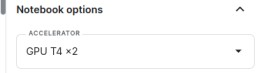


2. Turn on the gpu


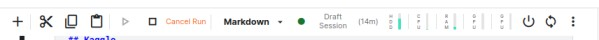



# NGROK

**Create [NGROK](https://ngrok.com/) Account**
**and then Copy Authtoken**

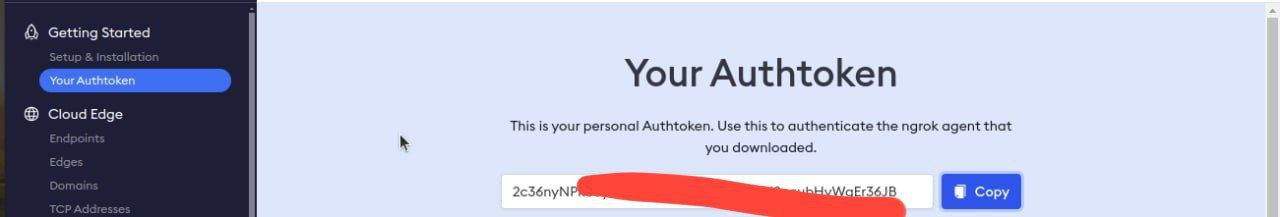

**Paste you authroken in secrets use NGROK_TOKEN as variable**


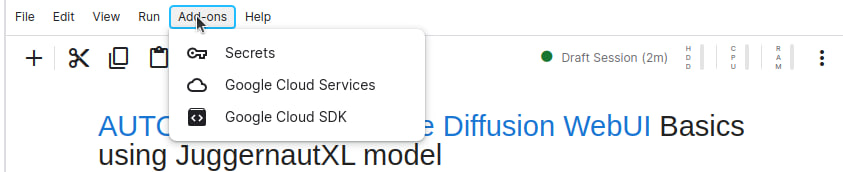

You can Directly assign NGROK_TOKEN ="your token".
but it is safer to hide in secret if you want to your notebook to be public

In [ ]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
NGROK_TOKEN= user_secrets.get_secret("NGROK_TOKEN")

# Installing various Dependencies

In [ ]:
# Install Google Performance Tools package for performance analysis and profiling.
!apt-get install -y google-perftools 

# Install aria2 package for fast and lightweight download utility.
!apt -y install -qq aria2

# Install necessary packages: wget for downloading files, git for version control, python3 and python3-venv for Python environment.
!apt -y install wget git python3 python3-venv

# Uninstall existing torch, torchvision, and torchaudio packages to prevent conflicts or outdated versions.
!pip uninstall -y torch torchvision torchaudio

# Install specific versions of torch, torchvision, and torchaudio packages compatible with CUDA 11.7.
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

# Install pyngrok package for secure tunneling to expose local servers to the internet.
!pip install -q pyngrok
# Purge the pip cache to free up disk space. after installations
!python -m pip cache purge

# Cloning the webui repo

In [ ]:
# Clone the repository containing the Stable Diffusion WebUI from GitHub.
!git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui

# Downloading models from [Civitai](https://civitai.com/)
I'm installing the **[JugernautXL](https://civitai.com/models/133005/juggernaut-xl)  and [DreamshaperXL](https://civitai.com/models/112902?modelVersionId=333449) models** from **[civitai](https://civitai.com)**, but if you prefer, you can use a different model.
Search for the model, right clock on model safetensors copy link for download paste either at model 1 or 2
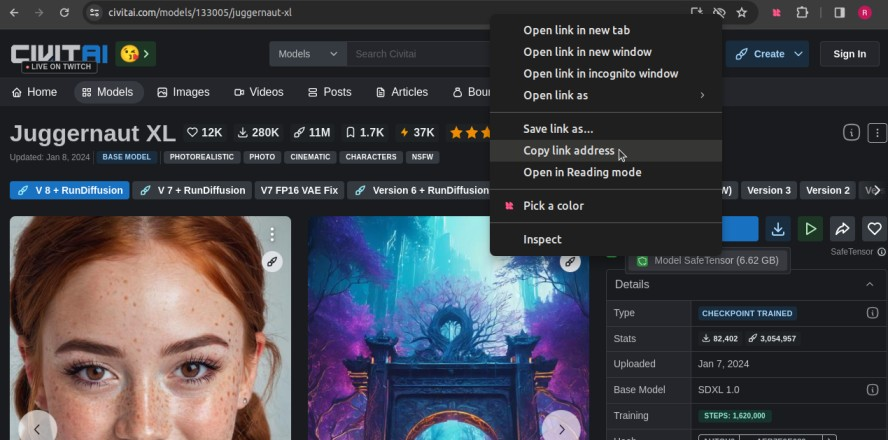

In [ ]:
model_1 = "https://civitai.com/api/download/models/288982"
model_1_name= "JuggernautXL"
model_2 = "https://civitai.com/api/download/models/333449"
model_2_name= "DreamshaperXL"

**Downloading using aria2c**
* You dont need to edit anything here!

In [ ]:
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M {model_1} -d /kaggle/working/stable-diffusion-webui/models/Stable-diffusion -o {model_1_name}.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M {model_2} -d /kaggle/working/stable-diffusion-webui/models/Stable-diffusion -o {model_2_name}.safetensors

* These are basic Extensions for webui
* nothing to edit here
* you can also add extension using webui 

In [ ]:
# --- EXTENSIONS --- #
# !git clone https://github.com/deforum-art/deforum-for-automatic1111-webui /kaggle/working/stable-diffusion-webui/extensions/deforum-for-automatic1111-webui
!git clone https://github.com/zanllp/sd-webui-infinite-image-browsing /kaggle/working/stable-diffusion-webui/extensions/sd-webui-infinite-image-browsing
!git clone https://github.com/etherealxx/batchlinks-webui /kaggle/working/stable-diffusion-webui/extensions/batchlinks-webui
!git clone https://github.com/pkuliyi2015/multidiffusion-upscaler-for-automatic1111 /kaggle/working/stable-diffusion-webui/extensions/multidiffusion-upscaler-for-automatic1111
!git clone https://github.com/mcmonkeyprojects/sd-dynamic-thresholding /kaggle/working/stable-diffusion-webui/extensions/sd-dynamic-thresholding
!git clone https://github.com/DominikDoom/a1111-sd-webui-tagcomplete /kaggle/working/stable-diffusion-webui/extensions/a1111-sd-webui-tagcomplete
!git clone https://github.com/aka7774/sd_filer /kaggle/working/stable-diffusion-webui/extensions/sd_filer
!git clone https://github.com/Bing-su/adetailer /kaggle/working/stable-diffusion-webui/extensions/adetailer
!git clone https://github.com/thomasasfk/sd-webui-aspect-ratio-helper /kaggle/working/stable-diffusion-webui/extensions/sd-webui-aspect-ratio-helper
!git clone https://github.com/novitalabs/sd-webui-cleaner /kaggle/working/stable-diffusion-webui/extensions/sd-webui-cleaner
!git clone https://github.com/BlafKing/sd-civitai-browser-plus /kaggle/working/stable-diffusion-webui/extensions/sd-civitai-browser-plus

This is webui configuration,
again no change

In [ ]:
%cd /kaggle/working/stable-diffusion-webui

# - UI Config - #
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/TNitro/ui-config/resolve/main/ui-config.json -d /kaggle/working/stable-diffusion-webui -o ui-config.json
!sed -i -e 's/\["sd_model_checkpoint"\],/\["sd_model_checkpoint","sd_vae","CLIP_stop_at_last_layers"\],/g' /kaggle/working/stable-diffusion-webui/modules/shared_options.py
!sed -i -e 's/"\[seed\]"/"\[model_name\],\[seed\]"/g' /kaggle/working/stable-diffusion-webui/modules/images.py
!sed -i -e 's/"txt2img\/Negative prompt\/value": "",/"txt2img\/Negative prompt\/value": "(low quality:1.1), (worst quality:1.1), (bad quality:1.1), lowres,",/g' /kaggle/working/stable-diffusion-webui/ui-config.json
!sed -i -e 's/"txt2img\/Sampling method\/value": "Euler a",/"txt2img\/Sampling method\/value": "DPM++ 2M Karras",/g' /kaggle/working/stable-diffusion-webui/ui-config.json

**Here comes launching, no need to edit, just uncomment using "ctr+/"**
**wait for 2 Minutes, you will get the link for webui, free.app extension
you will get such a link, click on the link**


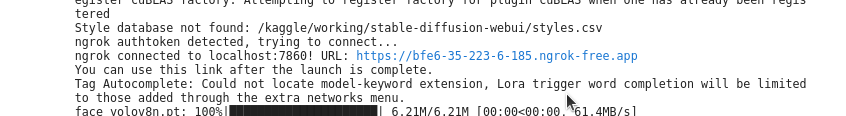

In [ ]:
# command line argument to launch the webui

#!python launch.py --enable-insecure-extension-access --disable-safe-unpickle --no-hashing --xformers --ngrok {NGROK_TOKEN}

**You can check for the best config, parameters for any model on civitai. 
You can play with parameters but defualt 1024x1024 generates better results.**
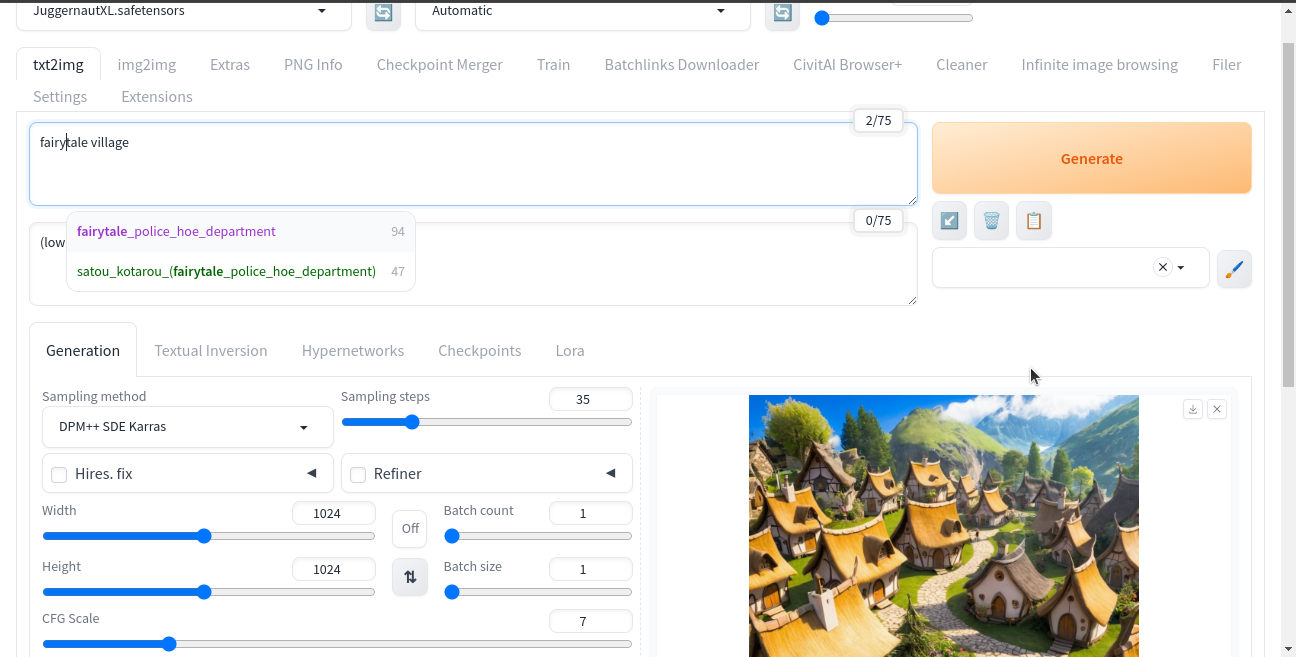